In [1]:
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'

In [2]:
import os

In [3]:
os.path.basename(url)

'housing.tgz'

In [6]:
file_path = os.getcwd()

In [7]:
os.listdir(file_path)

['.DS_Store', 'example.ipynb', '.ipynb_checkpoints', 'example2.ipynb']

In [1]:
# Data Ingestion

In [2]:
import pandas as pd

In [4]:
df =pd.read_csv("../housing/artifact/data_ingestion/2022-07-02_21-14-55/raw_data/housing.csv")

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:ylabel='Frequency'>

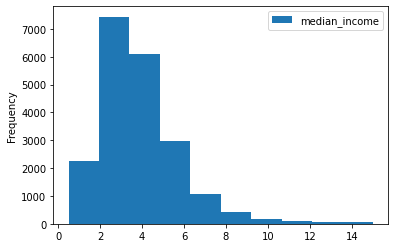

In [13]:
df[['median_income']].plot(kind="hist")

In [14]:
df["income_cat"]= pd.cut(
                df["median_income"],
                bins =[0,1.5,3.0,4.5,6.0,np.inf],
                labels = [1,2,3,4,5],
            )


In [15]:
df["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

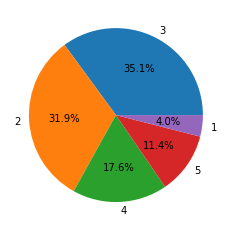

In [17]:
plt.pie(df.income_cat.value_counts(), labels= df.income_cat.value_counts().index, autopct="%1.1f%%")
plt.show()

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

In [19]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [20]:
for train_ix, test_ix in split.split(df, df["income_cat"]):
    print(train_ix, test_ix)

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]


In [21]:
train_df = df.loc[train_ix]

In [22]:
df.shape

(20640, 11)

In [23]:
train_df.shape

(16512, 11)

In [24]:
test_ix = df.loc[test_ix]

In [25]:
test_ix.shape

(4128, 11)

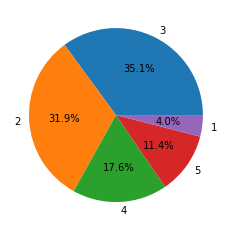

In [30]:
plt.pie(train_df.income_cat.value_counts(), labels= train_df.income_cat.value_counts().index, autopct="%1.1f%%")
plt.show()

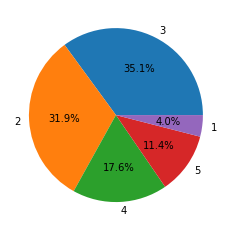

In [27]:
plt.pie(test_ix.income_cat.value_counts(), labels= test_ix.income_cat.value_counts().index, autopct="%1.1f%%")
plt.show()

In [33]:
df.dtypes, df.dtypes.values

(longitude              float64
 latitude               float64
 housing_median_age     float64
 total_rooms            float64
 total_bedrooms         float64
 population             float64
 households             float64
 median_income          float64
 median_house_value     float64
 ocean_proximity         object
 income_cat            category
 dtype: object,
 array([dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
        CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)],
       dtype=object))

In [38]:
typesArray = df.dtypes.values
typesArray

array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
       CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)],
      dtype=object)

In [42]:
# get the float values using map
data_types = list(map(lambda x:str(x).replace("dtype('","").replace("')",""),typesArray))
data_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'object',
 'category']

In [40]:
columns = df.columns
columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [43]:
# convert the list to dict for data types and column names
data_types_dict = dict(zip(columns, data_types))
data_types_dict

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}